In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test

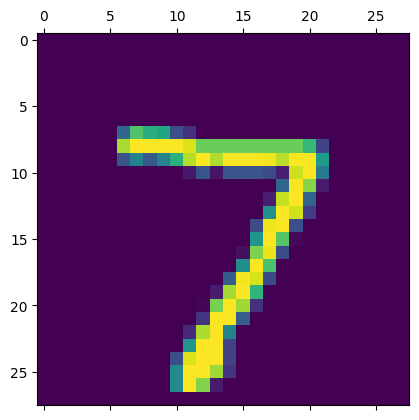

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_test[0]

7

In [ ]:
# Scaling the value to 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = keras.Sequential([
                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(100,activation ="relu"),
                 keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2785 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1276 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0890 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9758


[0.08488398790359497, 0.9757999777793884]

In [ ]:
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_label = [np.argmax(i) for i in y_predict]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)

Text(95.72222222222221, 0.5, 'truth')

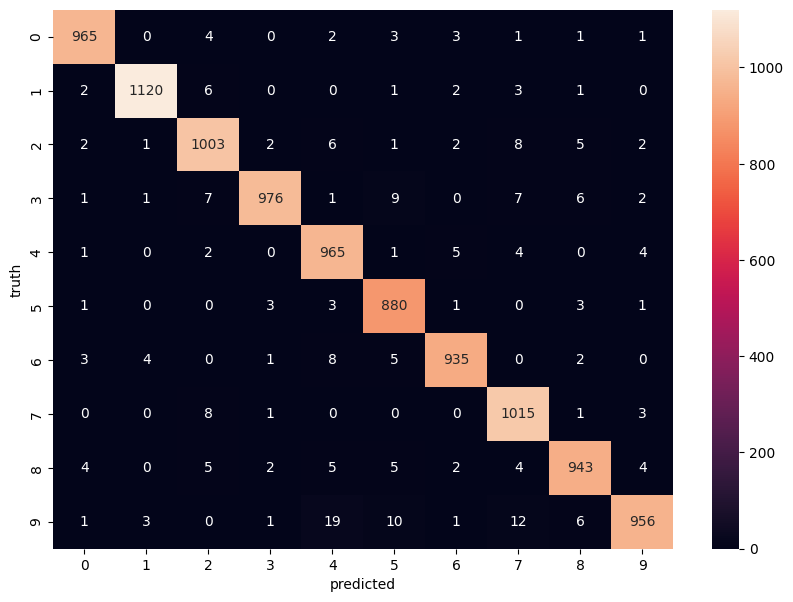

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [ ]:
cnn = keras.Sequential([
                 #cnn
                 keras.layers.Conv2D(filters= 20,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                 keras.layers.MaxPooling2D((2,2)),

                 keras.layers.Conv2D(filters= 30,kernel_size=(3,3),activation="relu"),
                 keras.layers.MaxPooling2D((2,2)),


                 #dense
                 keras.layers.Flatten(),
                 keras.layers.Dense(100,activation ="relu"),
                 keras.layers.Dense(10,activation="sigmoid")
])

cnn.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metrics=["accuracy"]
)

cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 49s 25ms/step - loss: 0.1705 - accuracy: 0.9494
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0530 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0202 - accuracy: 0.9933


In [ ]:
 cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0295 - accuracy: 0.9901


[0.029499750584363937, 0.9901000261306763]